In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans Mono'
input_path = '../../input'

In [2]:
from sklearn.model_selection import train_test_split

df = pd.read_csv(f'../../input/default of credit card clients.csv', header=1)
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['default payment next month'], random_state=42)
df_train = df_train.sort_values(by='ID').reset_index(drop=True)
df_test = df_test.sort_values(by='ID').reset_index(drop=True)

In [3]:
col_names = df_train.columns[1:-1]
col_names

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [4]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
2,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
3,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
4,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [6]:
df_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,14973.683417,167364.666667,1.604750,1.853792,1.552875,35.432625,-0.014125,-0.134083,-0.166917,-0.221333,...,43156.661458,40164.412625,38675.979875,5623.556292,5.879975e+03,5215.777583,4790.331833,4769.941750,5229.905500,0.221208
std,8641.664947,129511.313151,0.488915,0.792375,0.521903,9.195256,1.123155,1.198818,1.194166,1.161924,...,64046.730878,60627.850612,59308.737828,16148.316646,2.025298e+04,17513.554475,15060.693585,15048.470405,17850.346975,0.415069
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7513.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1746.000000,1225.000000,1000.000000,8.400000e+02,390.000000,291.000000,246.000000,100.000000,0.000000
50%,14966.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19004.500000,18102.500000,16993.000000,2100.500000,2.014000e+03,1805.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22438.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54386.500000,50142.250000,48977.250000,5018.250000,5.000000e+03,4580.500000,4015.250000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.215471e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


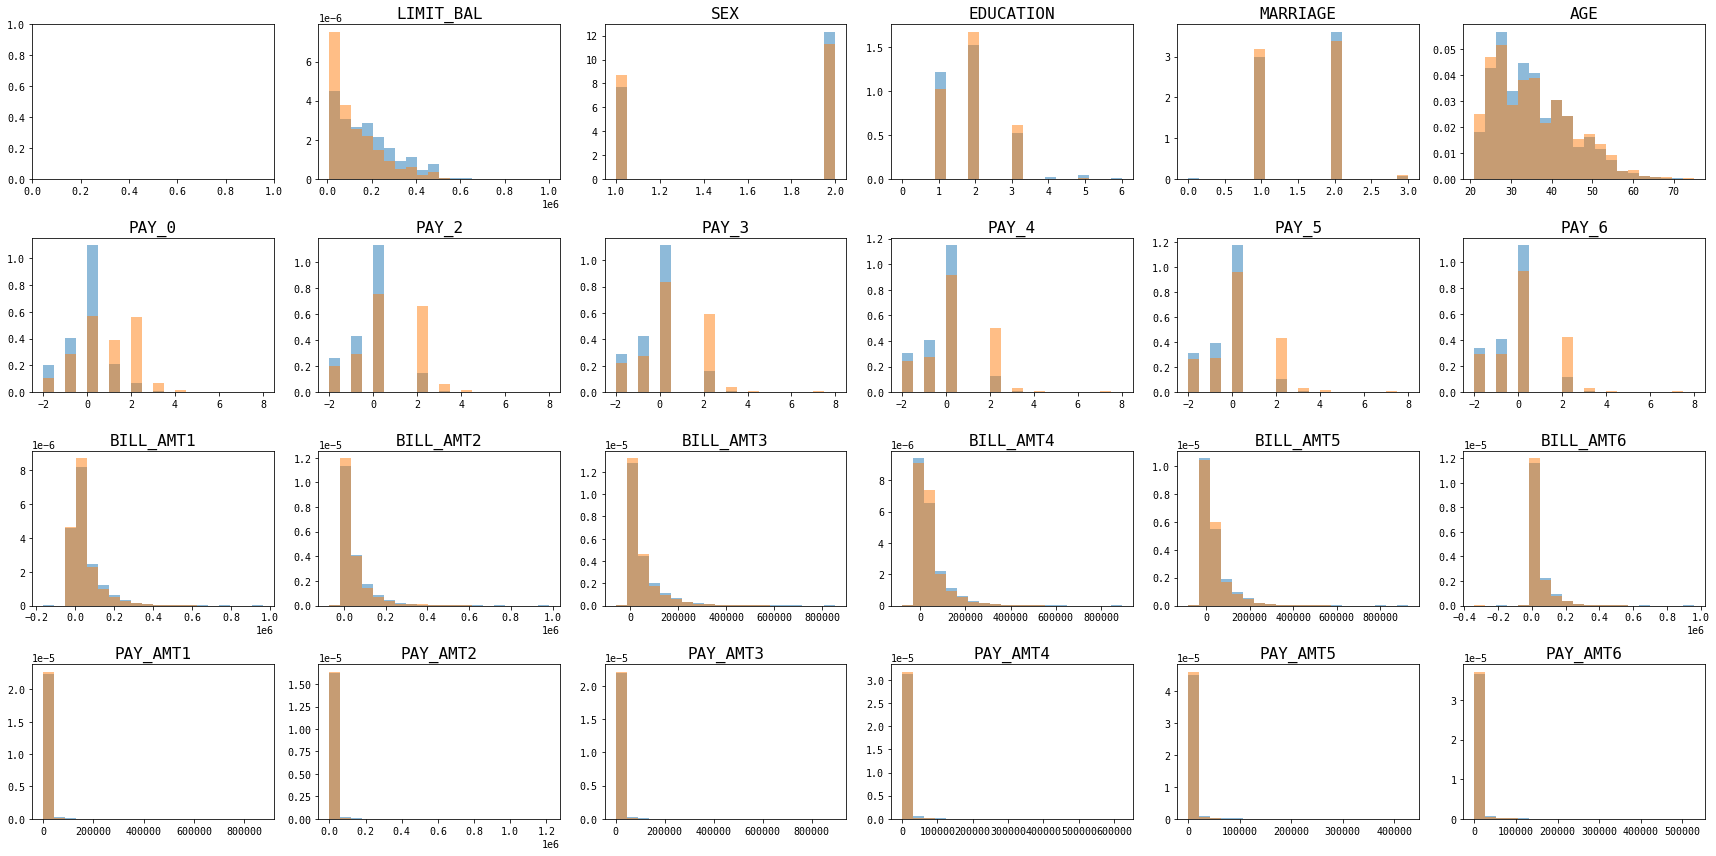

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(24, 12))
axs = axs.ravel()
for i in range(len(col_names)):
    ax = axs[i+1]
    _, bins = np.histogram(df_train[col_names[i]], bins=20)
    ax.hist(df_train.loc[df_train['default payment next month'] == 0, col_names[i]], bins=bins, density=True, color='C0', alpha=0.5)
    ax.hist(df_train.loc[df_train['default payment next month'] == 1, col_names[i]], bins=bins, density=True, color='C1', alpha=0.5)

    ax.set_title(col_names[i], fontsize=16)
plt.tight_layout(); plt.show(); plt.close()

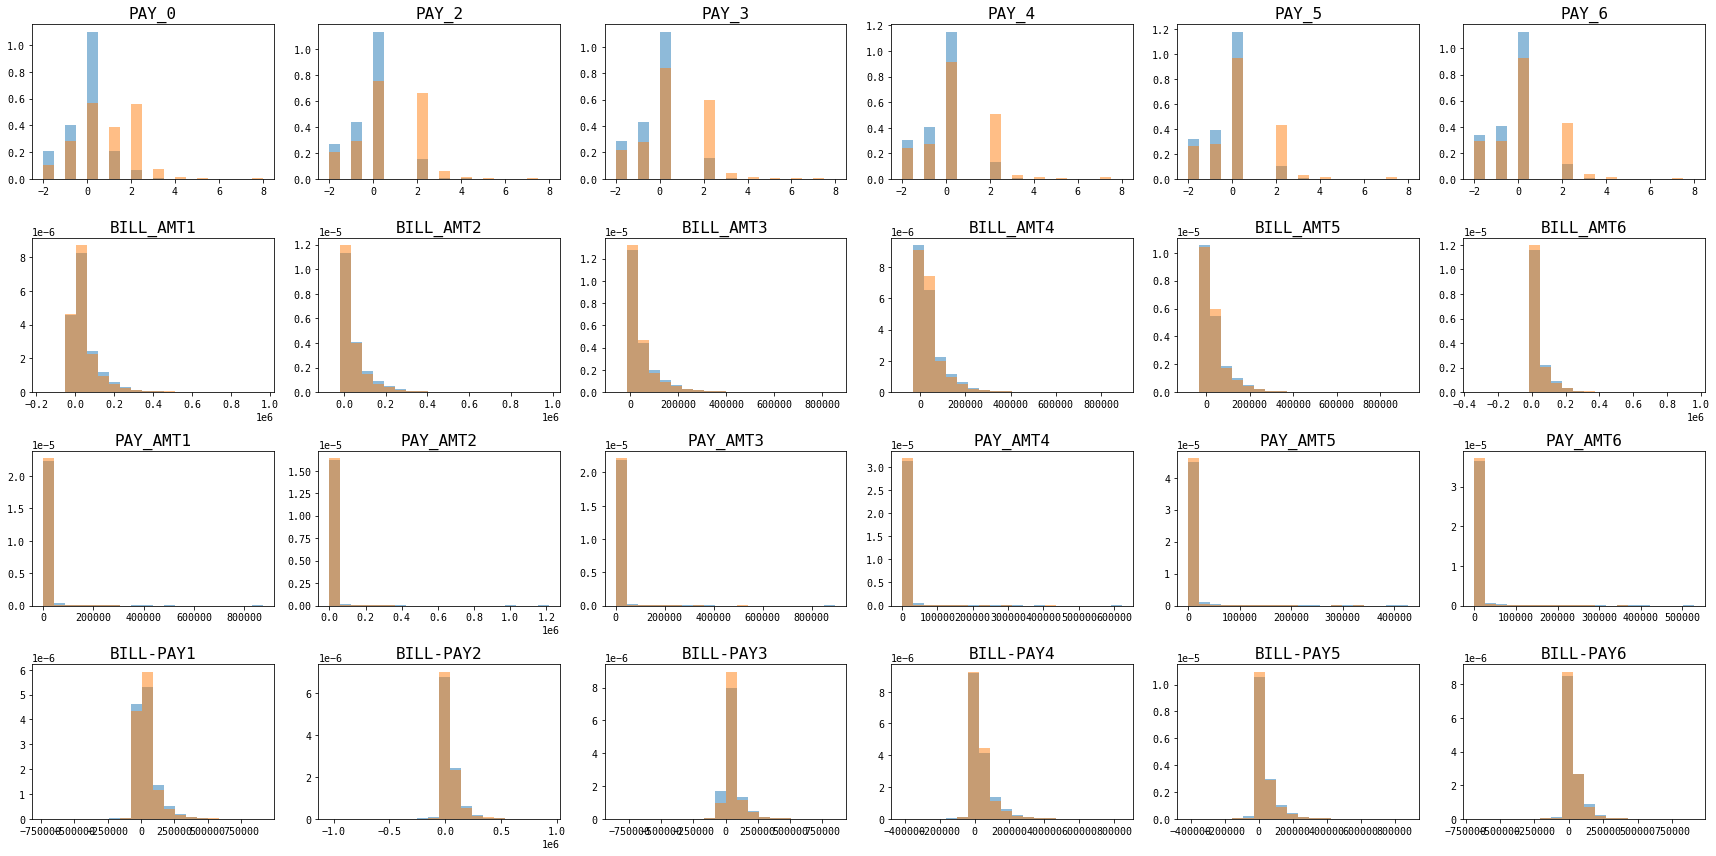

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(24, 12))
axs = axs.ravel()
for i in range(5, len(col_names)):
    ax = axs[i-5]
    _, bins = np.histogram(df_train[col_names[i]], bins=20)
    ax.hist(df_train.loc[df_train['default payment next month'] == 0, col_names[i]], bins=bins, density=True, color='C0', alpha=0.5)
    ax.hist(df_train.loc[df_train['default payment next month'] == 1, col_names[i]], bins=bins, density=True, color='C1', alpha=0.5)
    ax.set_title(col_names[i], fontsize=16)
for i in range(6):
    ax = axs[18+i]
    diff = df_train[col_names[11+i]] - df_train[col_names[17+i]]
    _, bins = np.histogram(diff, bins=20)
    ax.hist(diff[df_train['default payment next month'] == 0], bins=bins, density=True, color='C0', alpha=0.5)
    ax.hist(diff[df_train['default payment next month'] == 1], bins=bins, density=True, color='C1', alpha=0.5)
    ax.set_title(f'BILL-PAY{i+1}', fontsize=16)
plt.tight_layout(); plt.show(); plt.close()

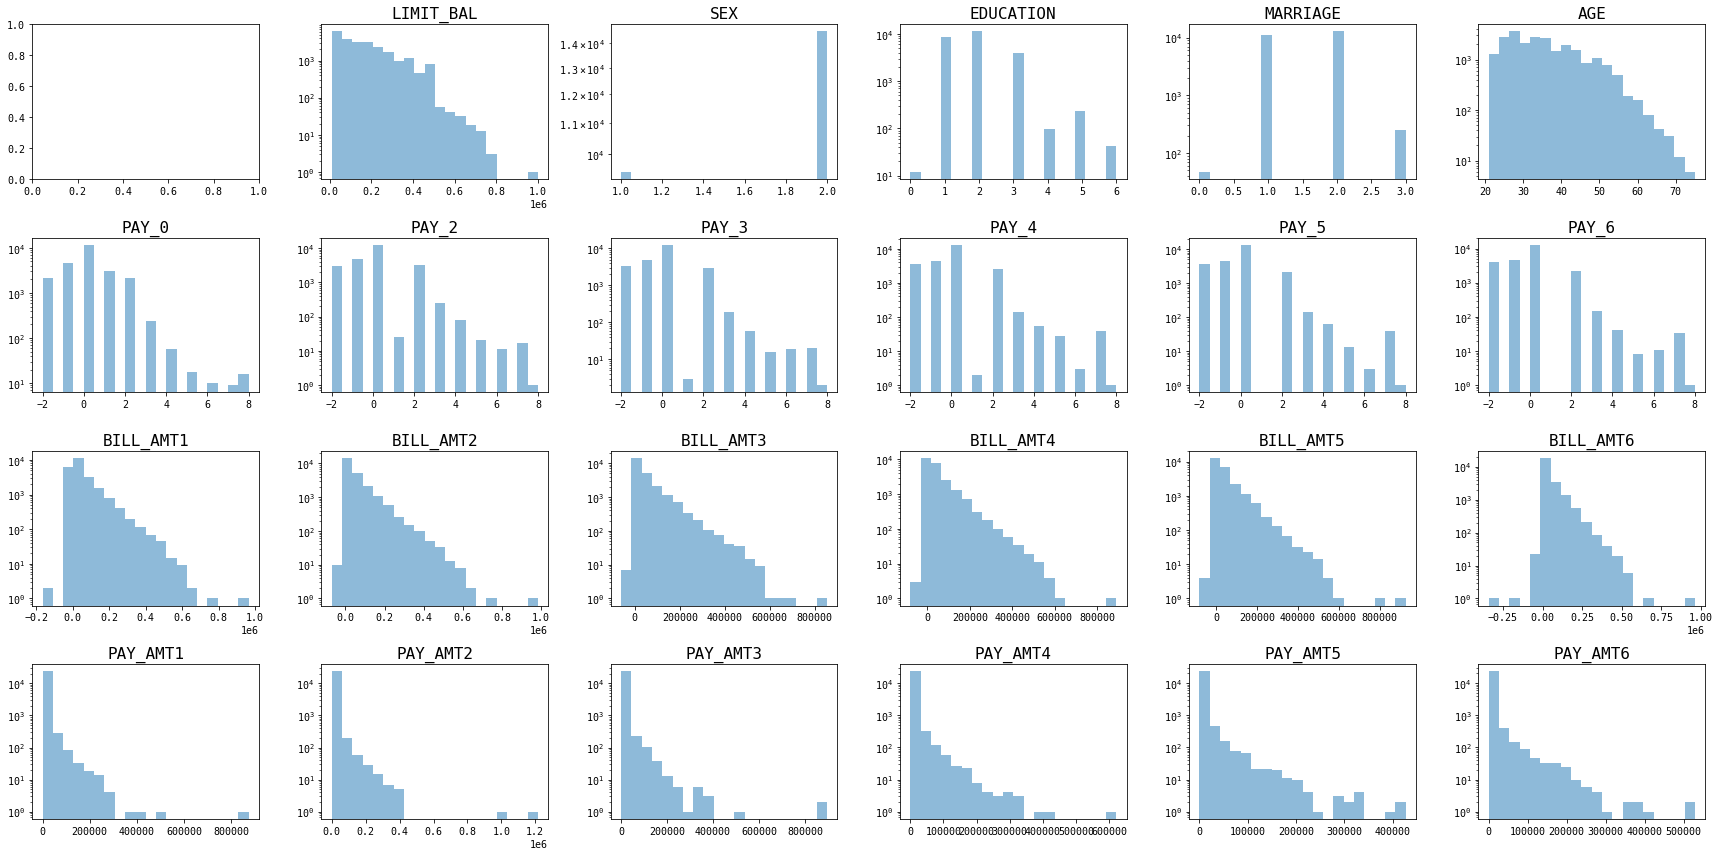

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(24, 12))
axs = axs.ravel()
for i in range(len(col_names)):
    ax = axs[i+1]
    _, bins = np.histogram(df_train[col_names[i]], bins=20)
    ax.hist( df_train[col_names[i]], bins=bins, color='C0', alpha=0.5)
    ax.set_yscale('log')
    ax.set_title(col_names[i], fontsize=16)
plt.tight_layout(); plt.show(); plt.close()

### More EDA

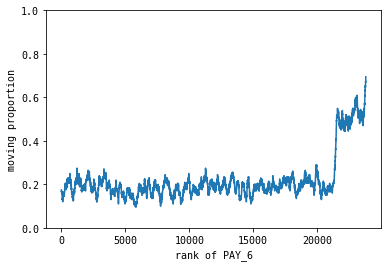

In [33]:
ser1 = df_train['PAY_6'].values
# ser1 = df_train.loc[:, 'PAY_0':'PAY_6'].mean(axis=1).values
ser2 = df_train['default payment next month'].values
ser2 = ser2[np.argsort(ser1)]
ser1 = ser1[np.argsort(ser1)]
ser2 = np.convolve(ser2, np.ones((200, ))/200, mode='valid')
plt.plot(ser2)
plt.xlabel('rank of PAY_6')
plt.ylim(0, 1); plt.ylabel('moving proportion')
plt.show(); plt.close()

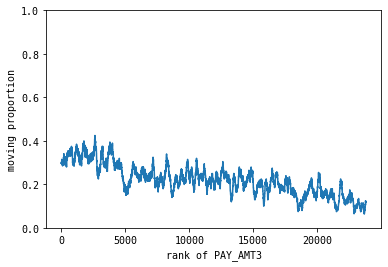

In [38]:
ser1 = df_train['PAY_AMT3'].values
# ser1 = df_train.loc[:, 'PAY_0':'PAY_6'].mean(axis=1).values
ser2 = df_train['default payment next month'].values
ser2 = ser2[np.argsort(ser1)]
ser1 = ser1[np.argsort(ser1)]
ser2 = np.convolve(ser2, np.ones((200, ))/200, mode='valid')
plt.plot(ser2)
plt.xlabel('rank of PAY_AMT3')
plt.ylim(0, 1); plt.ylabel('moving proportion')
plt.show(); plt.close()

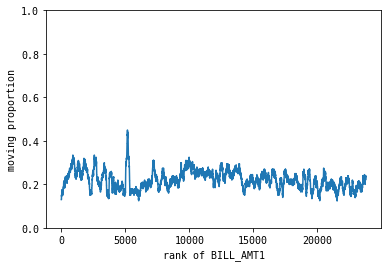

In [37]:
ser1 = df_train['BILL_AMT1'].values
# ser1 = df_train.loc[:, 'PAY_0':'PAY_6'].mean(axis=1).values
ser2 = df_train['default payment next month'].values
ser2 = ser2[np.argsort(ser1)]
ser1 = ser1[np.argsort(ser1)]
ser2 = np.convolve(ser2, np.ones((200, ))/200, mode='valid')
plt.plot(ser2)
plt.xlabel('rank of BILL_AMT1')
plt.ylim(0, 1); plt.ylabel('moving proportion')
plt.show(); plt.close()

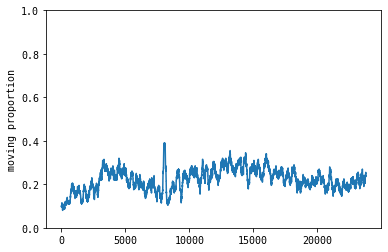

In [49]:
ser1 = (df_train.loc[:, 'BILL_AMT4':'BILL_AMT6'].sum(axis=1) - df_train.loc[:, 'PAY_AMT4':'PAY_AMT6'].sum(axis=1)).values
# ser1 = df_train.loc[:, 'PAY_0':'PAY_6'].mean(axis=1).values
ser2 = df_train['default payment next month'].values
ser2 = ser2[np.argsort(ser1)]
ser1 = ser1[np.argsort(ser1)]
ser2 = np.convolve(ser2, np.ones((200, ))/200, mode='valid')
plt.plot(ser2)
# plt.xlabel('rank of BILL_AMT1')
plt.ylim(0, 1); plt.ylabel('moving proportion')
plt.show(); plt.close()

2nd

In [10]:
col_names

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin

X_train, X_test = df_train[col_names], df_test[col_names]
y_train, y_test = df_train['default payment next month'], df_test['default payment next month']

class MyFeatureTransformer(BaseEstimator, TransformerMixin):
    pow_tfm_names = [
        'LIMIT_BAL', 'AGE',
        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    ]

    def __init__(self):
        super(MyFeatureTransformer, self).__init__()
        self.power_transformer1 = PowerTransformer()
        self.power_transformer2 = PowerTransformer()

    def fit(self, X, y=None):
        self.power_transformer1.fit(X[self.pow_tfm_names], y)
        delta = X.loc[:, 'BILL_AMT1':'BILL_AMT6'].values - X.loc[:, 'PAY_AMT1':'PAY_AMT6'].values
        self.power_transformer2.fit(delta)
        return self
    
    def transform(self, X, y=None):
        zero_or_not = (X.loc[:, 'BILL_AMT1':'PAY_AMT6'] == 0)
        pow_tfmed = self.power_transformer1.transform(X[self.pow_tfm_names])
        delta = X.loc[:, 'BILL_AMT1':'BILL_AMT6'].values - X.loc[:, 'PAY_AMT1':'PAY_AMT6'].values
        delta_pow_tfmed = self.power_transformer2.transform(delta)
        return np.concatenate([X, zero_or_not, pow_tfmed, delta, delta_pow_tfmed], axis=1)

model = make_pipeline(
    MyFeatureTransformer(),
    StandardScaler(),
    SVC(
        random_state=42
    )
)
model.fit(X_train, y_train)
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, model.predict(X_test)))

0.8262083333333333
0.814


In [15]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous

param_grid = {
    'svc__C': Continuous(1e-2, 1e2, distribution='log-uniform'),
    'svc__kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'svc__degree': Integer(2, 20),
    'svc__gamma': Continuous(1e-4, 1e0, distribution='log-uniform')
}

ga_cv = GASearchCV(
    model,
    param_grid=param_grid,
    population_size=10,
    generations=40,
    scoring='accuracy'
)
ga_cv.fit(X_train, y_train)

what after log transform

c:\Users\sinwa\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


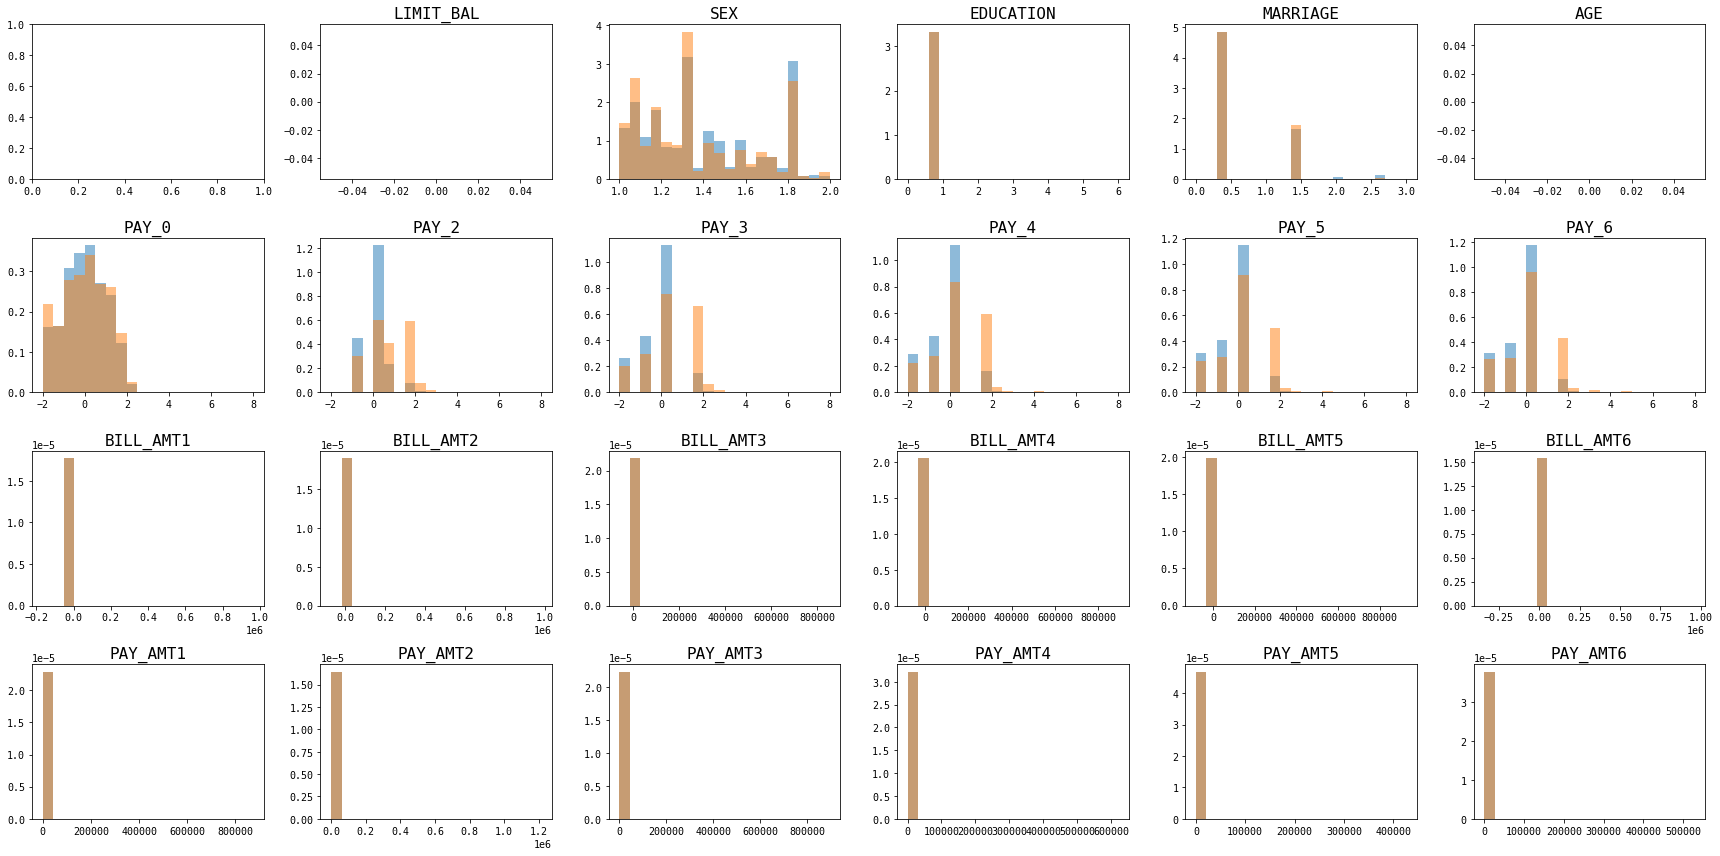

In [12]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
tfmed = pt.fit_transform(df_train.values)

fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(24, 12))
axs = axs.ravel()
for i in range(len(col_names)):
    ax = axs[i+1]
    _, bins = np.histogram(df_train[col_names[i]], bins=20)
    ax.hist(tfmed[df_train['default payment next month'] == 0, i], bins=bins, density=True, color='C0', alpha=0.5)
    ax.hist(tfmed[df_train['default payment next month'] == 1, i], bins=bins, density=True, color='C1', alpha=0.5)

    ax.set_title(col_names[i], fontsize=16)
plt.tight_layout(); plt.show(); plt.close()